# Aplicaciones de Redes Bayesianas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg" width="400px" height="300px" />

> Con el marco teórico que hemos desarrollado hasta el día de hoy, podemos revisar algunas aplicaciones interesantes de lo que hemos venido estudiando.

## 1. Naive Bayes

En la tarea de redes Bayesianas vimos el modelo de Naive Bayes:

![nb](figures/NaiveBayes.png)

Vimos que, para todo par de nodos de características $X_i$ y $X_j$, este modelo induce que:

$$
(X_i \perp X_j | C),
$$

lo cual no siempre es válido. Aún así es un modelo bastante utilizado por su simplicidad, y poque aunque la suposición de independencia no siempre se satisface, da resultados razonablemente buenos en ciertos tipos de problemas.

In [1]:
# Importar pandas y numpy
import pandas as pd
import numpy as np

In [2]:
# Lectura de datos del Titanic
data = pd.read_csv("titanic/train.csv", index_col=0)

In [4]:
# Datos
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Trabajar solo con categóricas
data = data[["Pclass", "Sex", "Age", "SibSp",
             "Parch", "Embarked", "Survived"]]

In [6]:
# Exlainers y target
X = data.drop(columns=["Survived"])
y = data["Survived"]

In [10]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,3,male,22.0,1,0,S
2,1,female,38.0,1,0,C
3,3,female,26.0,0,0,S
4,1,female,35.0,1,0,S
5,3,male,35.0,0,0,S
...,...,...,...,...,...,...
887,2,male,27.0,0,0,S
888,1,female,19.0,0,0,S
889,3,female,NaN,1,2,S


In [7]:
# Importar librerías necesarias
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [8]:
# Definición de clase para encoding de varias columnas
class LabelEncoderMulti(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
        self.encoders = None
        
    def fit(self, X, y=None):
        self.encoders = dict()
        for feature in self.features:
            self.encoders[feature] = LabelEncoder().fit(X[:, feature])
            
        return self
    
    def transform(self, X, y=None):
        Xt = X.copy()
        for feature in self.features:
            Xt[:, feature] = self.encoders[feature].transform(X[:, feature])
        
        return Xt
    
    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

In [9]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [11]:
# Pipeline de modelo
NB_model = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", LabelEncoderMulti(features=[1, -1])),
    ("classifier", CategoricalNB(alpha=0.1))
])

In [12]:
# Entrenamiento
NB_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=0)),
                ('encoder', LabelEncoderMulti(features=[1, -1])),
                ('classifier',
                 CategoricalNB(alpha=0.1, class_prior=None, fit_prior=True))],
         verbose=False)

In [13]:
# Score de entrenamiento
NB_model.score(X_train, y_train)

0.818976279650437

In [14]:
# Score de los datos de prueba
NB_model.score(X_test, y_test)

0.7666666666666667

In [15]:
# CPDs
classifier = NB_model.named_steps["classifier"]

In [16]:
classifier.feature_log_prob_

[array([[-8.51398806, -1.9195746 , -1.72164363, -0.39399423],
        [-8.01763716, -0.93508859, -1.35706201, -1.05067002]]),
 array([[-1.89218104, -0.16339305],
        [-0.37637392, -1.15946368]]),
 array([[-8.52931937, -6.1314241 , -4.41844551, -6.1314241 , -5.48479693,
         -8.52931937, -6.1314241 , -6.1314241 , -5.48479693, -4.59749374,
         -5.48479693, -5.09533217, -8.52931937, -8.52931937, -4.8157473 ,
         -8.52931937, -3.91419885, -4.26663949, -3.38765581, -3.51203953,
         -3.81978917, -3.38765581, -3.51203953, -4.01845986, -1.36614698,
         -3.51203953, -4.01845986, -4.26663949, -3.27704594, -3.81978917,
         -3.51203953, -4.26663949, -4.01845986, -4.13487022, -4.01845986,
         -4.59749374, -3.81978917, -4.59749374, -4.41844551, -4.13487022,
         -4.01845986, -4.8157473 , -4.26663949, -4.8157473 , -4.41844551,
         -4.13487022, -5.09533217, -4.13487022, -5.09533217, -5.48479693,
         -4.8157473 , -5.09533217, -5.09533217, -8.52931937,

In [18]:
X.describe()

,Pclass,Age,SibSp,Parch
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594
std,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000
75%,3.000000,38.000000,1.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000


## Regresión lineal 

Desde una perspectiva Bayesiana, podemos representar las VA objetivo $y$ y parámetros $w$, datos $X$ de un modelo lineal $y=Xw + \epsilon$ como:

![lr](figures/linear_regression.png)

Como no nos interesa modelar los datos, sino los parámetros, estudiamos la distribución posterior $P(w | X, y)$, la cual se puede reescribir como:

$$
P(w | X, y) = \frac{P(y, w | X)}{P(y | X)}.
$$

Por otra parte, usando la definición de probabilidad condicional y la factorización inducida, tenemos que:

$$
P(y, w | X) = P(y | X, w) P(w),
$$

de donde

$$
P(w | X, y) = \frac{P(y, w | X)}{P(y | X)} = \frac{P(y | X, w) P(w)}{P(y | X)}.
$$

Estas distribuciones tienen nombres muy específicos:

- $P(w | X, y)$ se conoce como la **distribución posterior**.
- $P(y | X, w)$ se conoce como la **función de verosimilitud**.
- $P(w)$ se conoce como la **distribución previa**.
- $P(y | X)$ se conoce como la **distribución de evidencia**.

1. La distribución posterior la queremos calcular a través de las demás.

2. La función de verosimilitud la podemos suponer razonablemente como:

$$
P(y | X, w) = \mathcal{N}(y | X w, \sigma^2 I) \propto \exp\left\{-\frac{1}{2 \sigma^2} ||y - X w||^2\right\},
$$

3. De la misma forma, para codificar el conocimiento previo sobre los parámetros podemos suponer:

$$
P(w) = \mathcal{N}(w | 0, \gamma^2 I),
$$

La distribución de evidencia es especialmente compleja. Para ver porqué, respondamos las preguntas:

- ¿Qué significa $P(y | X)$?
- ¿Qué implicaría conocer $P(y | X)$?

Por esto, los métodos Bayesianos rondan a través de evitar el cálculo de esta distribución a través de distintas maneras.

### 1. Estimador MAP

En general nos interesa encontrar la **distribución posterior**, sin embargo, para este ejemplo, encontraremos sólo **la moda** de la misma.

De modo que para encontrar el valor más probable de los parámetros según la evidencia de los datos y el objetivo, hacemos:

$$
\arg \max_{w} P(w | X, y) = \arg \max_{w} \frac{P(y, w | X)}{P(y | X)} = \arg \max_{w} P(y, w | X) = \arg \max_{w} P(y | X, w) P(w)
$$

___
**Propiedad de los logaritmos:** dado que el logaritmo es una función creciente,

$$
\arg \max_x f(x) = \arg \max_x \log f(x) = \arg \min_x - \log f(x)
$$
___

Así que el anterior problema lo podemos reescribir como:

$$
\arg \min_w -\log P(y | X, w) - \log P(w)
$$

Desarrollando los logaritmos <font color=green>en el pizarrón</font>:

\begin{align}
-\log P(y | X, w) - \log P(w) & = \dots \\
                              & = \dots \\
                              & = \dots \\
                              & = \log C + \frac{1}{2\sigma^2} (y - X w)^T (y - X w) + \frac{1}{2\gamma^2} w^T w \\
                              & = \log C + \frac{1}{2\sigma^2} ||y - X w||^2 + \frac{1}{2\gamma^2} ||w||^2
\end{align}

Finalmente, podemos resolver el problema 

$$
\arg \min_w ||y - X w||^2 + \lambda ||w||^2,
$$

con $\lambda = \frac{\sigma^2}{\gamma^2}$. <font color=green> Interpretación de $\lambda$</font>.

Se puede demostrar que la solución es:

$$
w^{*}_{reg} = (X^T X + \lambda I)^{-1} X^T y
$$

In [21]:
# Importar numpy 
import numpy as np
from matplotlib import pyplot as plt

In [20]:
# Fijar semilla para reproducibilidad
np.random.seed(1001)
# Dispersión de los datos
sigma = 2
# Generar datos (recta + ruido)
N = 101
x = np.linspace(0, 10, N)
y = 5 + 2 * x + sigma * np.random.normal(size=(N,))

Text(0, 0.5, 'y')

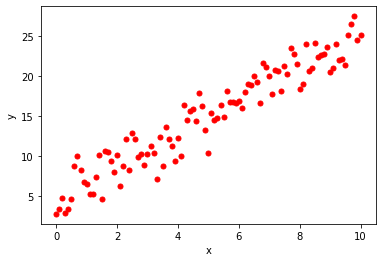

In [22]:
# Graficar
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'or', ms=5, label="Data")
plt.xlabel("x")
plt.ylabel("y")

In [23]:
# Importar sklearn.linear_model.Ridge
from sklearn.linear_model import Ridge
# Importar sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import StandardScaler

In [40]:
# Scaler-regressor pipeline
regressor_model = Pipeline([
    # ("scaler", StandardScaler()),
    ("reg", Ridge(alpha=0.01))
])

In [41]:
# Ajuste del modelo
regressor_model.fit(x.reshape((-1, 1)), y)

Pipeline(memory=None,
         steps=[('reg',
                 Ridge(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [42]:
# Parámetros más probables
regressor_model.named_steps["reg"].coef_, regressor_model.named_steps["reg"].intercept_

(array([2.06247012]), 4.6752114411804655)

Text(0, 0.5, 'y')

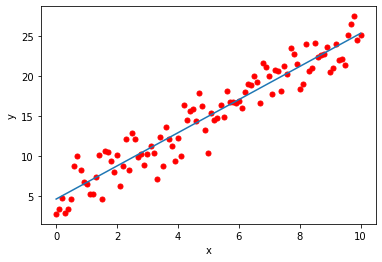

In [34]:
# Gráfico
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'or', ms=5, label="Data")
plt.plot(x, regressor_model.predict(x.reshape((-1, 1))))
plt.xlabel("x")
plt.ylabel("y")

### 2. Distribución previa conjugada

Bajo el framework de estimación MAP, quitamos el denominador puesto que este no dependía de $w$, que era sobre lo que estábamos maximizando.

Esto lo podemos generalizar, dándonos cuenta que la distribución posterior $P(w | X, y)$ es distribución sobre $w$, y que la distribución de evidencia $P(y | X)$ es tan solo un factor **normalizante** sobre el producto $P(y | X, w) P(w)$.

¿De qué nos sirve esto? Veamos:

La función de verosimilitud $P(y | X, w)$ la suponemos una distribución normal de la forma:

$$
P(y | X, w) = \mathcal{N}(y | X w, \sigma^2 I) \propto \exp\left\{-\frac{1}{2 \sigma^2} ||y - X w||^2\right\}.
$$

Notemos que, para cualquier $w_0 \in \mathbb{R}^d$:

\begin{align}
||y - X w||^2 & = ||X w - y||^2 \\
              & = ||X (w - w_0) + X w_0 - y||^2 \\
              & = \left(X (w - w_0) + X w_0 - y\right)^T \left(X (w - w_0) + X w_0 - y\right) \\
              & = (w - w_0)^T X^T X (w - w_0) + 2 (w - w_0)^T X^T (X w_0 - y) + ||X w_0- y||^2 
\end{align}

En particular, haciendo $w_0 = w^* = \left(X^T X\right)^{-1} X^T y$ (solución de mínimos cuadrados), se observa que:

\begin{array}
2 (w - w^*)^T X^T (X w^* - y) & = 2 (Xw - Xw^*)^T  (X w^* - y) \\
                              & = 2 \left[w^T X^T X w^* - w^T X^Ty - (w^*)^T X^T X w^* + (w^*)^T X^T y \right]\\
                              & = 2 \left[w^T \underbrace{X^T X \left(X^T X\right)^{-1}}_{I} X^T y - w^T X^Ty - y^T X \underbrace{\left(X^T X\right)^{-1} X^T X}_{I} \left(X^T X\right)^{-1} X^T y + y^T X \left(X^T X\right)^{-1} X^T y\right] \\
                              & = 2 \left[w^T X^T y - w^T X^Ty - y^T X  \left(X^T X\right)^{-1} X^T y + y^T X \left(X^T X\right)^{-1} X^T y\right] \\
                              & = 0.
\end{array}

De esta manera: 

$$
||y - X w||^2 = (w - w^*)^T X^T X (w - w^*) + \underbrace{||X w^*- y||^2 }_{f(X, y)}
$$

Así, concluimos que

\begin{align}
P(y | X, w) & = \mathcal{N}(y | X w, \sigma^2 I) \\
            & \propto \exp\left\{-\frac{1}{2 \sigma^2} ||y - X w||^2\right\} \\
            & \propto \exp\left\{-\frac{1}{2 \sigma^2} (w - w^*)^T X^T X (w - w^*)\right\} \\
            & \propto \mathcal{N}\left(w | w^*, \sigma^2 \left(X^T X\right)^{-1}\right)
\end{align}

#### ¡La función de verosimilitud es proporcional a una distribución Normal sobre los parámetros!

Retomando la distribución posterior, sabemos que

$$
P(w | X, y) \propto P(y | X, w) P(w) \propto \mathcal{N}\left(w | w^*, \sigma^2 \left(X^T X\right)^{-1}\right) P(w).
$$

___
El producto de dos densidades normales univariadas es otra densidad normal univariada. Esto se extiende al caso multivariable con:

$$
\mu_3 = \Sigma_2 \left(\Sigma_1 + \Sigma_2\right)^{-1} \mu_1 + \Sigma_1 \left(\Sigma_1 + \Sigma_2\right)^{-1} \mu_2, \qquad \Sigma_3 = \Sigma_1 \left(\Sigma_1 + \Sigma_2\right)^{-1} \Sigma_2,
$$

o equivalentemente

$$
\Sigma_3^{-1} = \Sigma_1^{-1} + \Sigma_2^{-1} , \qquad
\mu_3 = \Sigma_2 \Sigma_3^{-1} \mu_1 + \Sigma_1 \Sigma_3^{-1}\mu_2
$$

De manera que una previa conjugada para el caso anterior es:

$$
P(w) = \mathcal{N}(w | 0, \gamma^2 I),
$$
___

con lo cual:

$$
P(w | X, y) = \mathcal{N}\left(w | w^{**}, \Sigma^{*}\right).
$$

con

$$
\left(\Sigma^{*}\right)^{-1} = \frac{1}{\sigma^2} X^T X + \frac{1}{\gamma^2}I, \qquad w^{**} = \left(\frac{1}{\sigma^2} X^T X + \frac{1}{\gamma^2}I \right)^{-1}\frac{1}{\sigma^2} X^T X w^{*} = \left(X^T X + \frac{\sigma^2}{\gamma^2}I \right)^{-1} X^T y = w^{*}_{reg}, 
$$


Text(0, 0.5, 'y')

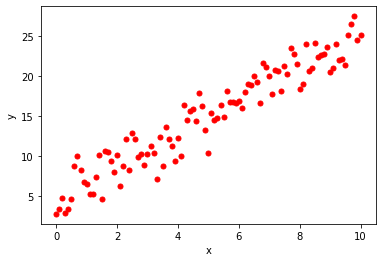

In [35]:
# Ya teníamos los datos. Graficamos
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'or', ms=5, label="Data")
plt.xlabel("x")
plt.ylabel("y")

In [36]:
# Construimos X
X = np.concatenate((np.ones((len(x), 1)), x.reshape(-1, 1)), axis=1)
X

array([[ 1. ,  0. ],
       [ 1. ,  0.1],
       [ 1. ,  0.2],
       [ 1. ,  0.3],
       [ 1. ,  0.4],
       [ 1. ,  0.5],
       [ 1. ,  0.6],
       [ 1. ,  0.7],
       [ 1. ,  0.8],
       [ 1. ,  0.9],
       [ 1. ,  1. ],
       [ 1. ,  1.1],
       [ 1. ,  1.2],
       [ 1. ,  1.3],
       [ 1. ,  1.4],
       [ 1. ,  1.5],
       [ 1. ,  1.6],
       [ 1. ,  1.7],
       [ 1. ,  1.8],
       [ 1. ,  1.9],
       [ 1. ,  2. ],
       [ 1. ,  2.1],
       [ 1. ,  2.2],
       [ 1. ,  2.3],
       [ 1. ,  2.4],
       [ 1. ,  2.5],
       [ 1. ,  2.6],
       [ 1. ,  2.7],
       [ 1. ,  2.8],
       [ 1. ,  2.9],
       [ 1. ,  3. ],
       [ 1. ,  3.1],
       [ 1. ,  3.2],
       [ 1. ,  3.3],
       [ 1. ,  3.4],
       [ 1. ,  3.5],
       [ 1. ,  3.6],
       [ 1. ,  3.7],
       [ 1. ,  3.8],
       [ 1. ,  3.9],
       [ 1. ,  4. ],
       [ 1. ,  4.1],
       [ 1. ,  4.2],
       [ 1. ,  4.3],
       [ 1. ,  4.4],
       [ 1. ,  4.5],
       [ 1. ,  4.6],
       [ 1. ,

In [37]:
from scipy.stats import multivariate_normal

In [43]:
# Gamma
gamma = 5
# Distribución posterior
l = sigma**2 / gamma**2
w_reg = np.linalg.inv(X.T.dot(X) + l * np.eye(2)).dot(X.T).dot(y)
cov = np.linalg.inv(X.T.dot(X) / sigma**2 + np.eye(2) / gamma**2)
posterior = multivariate_normal(mean=w_reg, cov=cov)

In [44]:
# Parámetros distribución posterior
posterior.mean, posterior.cov

(array([4.64799742, 2.06644029]),
 array([[ 0.15509629, -0.02314761],
        [-0.02314761,  0.00463686]]))

In [46]:
from mpl_toolkits.mplot3d import Axes3D

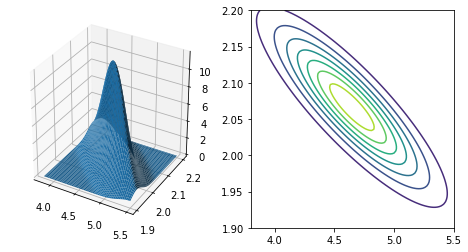

In [47]:
# Gráfico
w0 = np.linspace(3.8, 5.5, 100)
w1 = np.linspace(1.9, 2.2, 100)
w0, w1 = np.meshgrid(w0, w1)
z = posterior.pdf(np.dstack([w0, w1]))
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(w0, w1, z)
ax2 = fig.add_subplot(122)
ax2.contour(w0, w1, z)
plt.show()

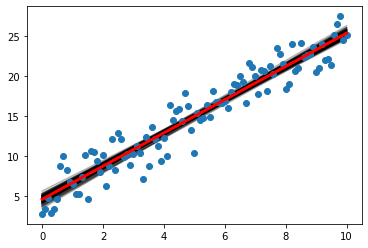

In [48]:
# Parámetros más probables y diferentes posibilidades
for i in range(100):
    wp = posterior.rvs()
    plt.plot(x, X.dot(wp), 'k', alpha=0.3)
plt.plot(x, y, 'o')
plt.plot(x, X.dot(posterior.mean), 'r', lw=3)

#### ¿Qué pasa si el valor que usamos para $\sigma$ se desvía del valor real?

In [50]:
# Gamma y sigma
gamma = 10
sigma = 10
# Distribución posterior
l = sigma**2 / gamma**2
w_reg = np.linalg.inv(X.T.dot(X) + l * np.eye(2)).dot(X.T.dot(y))
Sigma = np.linalg.inv(X.T.dot(X) / sigma**2 + np.eye(2) / gamma**2)
posterior = multivariate_normal(mean=w_reg, cov=Sigma)

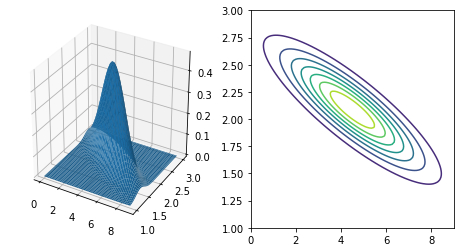

In [51]:
# Gráfico
w0 = np.linspace(0, 9, 100)
w1 = np.linspace(1, 3, 100)
w0, w1 = np.meshgrid(w0, w1)
z = posterior.pdf(np.dstack([w0, w1]))
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(w0, w1, z)
ax2 = fig.add_subplot(122)
ax2.contour(w0, w1, z)
plt.show()

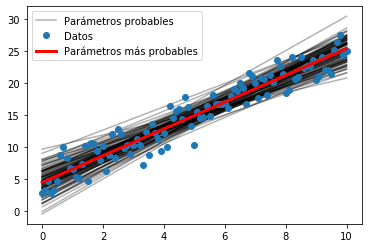

In [52]:
# Parámetros más probables y diferentes posibilidades
for i in range(100):
    wp = posterior.rvs()
    plt.plot(x, X.dot(wp), 'k', alpha=0.3)
plt.plot(x, X.dot(wp), 'k', alpha=0.3, label="Parámetros probables")
plt.plot(x, y, 'o', label="Datos")
plt.plot(x, X.dot(posterior.mean), 'r', lw=3, label="Parámetros más probables")
plt.legend()

### Aprendizaje en línea

Este esquema que acabamos de ver es susceptible para aprendizaje en línea. Dado que la distribución posterior es normal cuando la previa es normal (previa conjugada), podemos usar esta distribución posterior para el siguiente paso. La nueva previa para el siguiente paso sería:

$$
P_{k+1}(w) = P_{k}(w | X, y) = \mathcal{N}\left(w | \mu_k, \Sigma_k\right).
$$

**Tarea.** Dado que la función de verosimilitud satisface:

$$
P(y | X, w) \propto \mathcal{N}\left(w | w^*, \sigma^2 \left(X^T X\right)^{-1}\right),
$$

¿Cuál sería la distribución posterior con una previa normal $P(w)  = \mathcal{N}\left(w | \mu, \Sigma\right)$?

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>